In [1]:
base_transfer_set = ['01', '02', '04', '05', '08', '09', '12', '13', '16', '17', '18', '20']
target_transfer_set = ['03', '06', '07', '10', '11', '14', '15', '19']

import random
def random_combination(iterable, r):
    "Random selection from itertools.combinations(iterable, r)"
    pool = tuple(iterable)
    n = len(pool)
    indices = sorted(random.sample(range(n), r))
    return tuple(pool[i] for i in indices)

transfers_size_6 = []
for i in range(4):
    transfers_size_6.append(random_combination(target_transfer_set, 6))
print(transfers_size_6)
transfers_size_6 = [('03', '06', '07', '10', '11', '14'), ('03', '06', '07', '10', '14', '15'), ('03', '06', '07', '10', '14', '15'), ('03', '07', '10', '14', '15', '19')] 
for i, tmp in enumerate(transfers_size_6):
    transfers_size_6[i] = list(transfers_size_6[i])
print(transfers_size_6)

transfers_size_4 = []
for i in range(4):
    transfers_size_4.append(random_combination(target_transfer_set, 4))
print(transfers_size_4)
transfers_size_4 = [('06', '10', '14', '15'), ('03', '10', '14', '19'), ('03', '06', '10', '15'), ('03', '07', '10', '15')]
for i, tmp in enumerate(transfers_size_4):
    transfers_size_4[i] = list(transfers_size_4[i])
print(transfers_size_4)

transfers_size_3 = []
for i in range(4):
    transfers_size_3.append(random_combination(target_transfer_set, 3))
print(transfers_size_3)
transfers_size_3 = [('07', '11', '14'), ('06', '07', '10'), ('03', '15', '19'), ('06', '14', '19')]
for i, tmp in enumerate(transfers_size_3):
    transfers_size_3[i] = list(transfers_size_3[i])
print(transfers_size_3)

transfers_size_2 = []
for i in range(4):
    transfers_size_2.append(random_combination(target_transfer_set, 2))
print(transfers_size_2)
transfers_size_2 = [('06', '10'), ('07', '11'), ('06', '15'), ('14', '15')]
for i, tmp in enumerate(transfers_size_2):
    transfers_size_2[i] = list(transfers_size_2[i])
print(transfers_size_2)


[('03', '06', '10', '11', '14', '19'), ('03', '07', '10', '11', '14', '19'), ('03', '06', '11', '14', '15', '19'), ('06', '07', '11', '14', '15', '19')]
[['03', '06', '07', '10', '11', '14'], ['03', '06', '07', '10', '14', '15'], ['03', '06', '07', '10', '14', '15'], ['03', '07', '10', '14', '15', '19']]
[('03', '06', '10', '19'), ('03', '06', '11', '19'), ('03', '06', '14', '19'), ('03', '06', '07', '10')]
[['06', '10', '14', '15'], ['03', '10', '14', '19'], ['03', '06', '10', '15'], ['03', '07', '10', '15']]
[('03', '10', '11'), ('10', '11', '19'), ('03', '10', '14'), ('03', '10', '11')]
[['07', '11', '14'], ['06', '07', '10'], ['03', '15', '19'], ['06', '14', '19']]
[('14', '19'), ('14', '19'), ('14', '15'), ('06', '15')]
[['06', '10'], ['07', '11'], ['06', '15'], ['14', '15']]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    plt.show()

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Processing tranfers models at 10%, 20%, 25%, 50% and 80% data for gestures:  ['06', '07', '10']
Baseset:  ['01', '02', '04', '05', '08', '09', '12', '13', '16', '17', '18', '20']
Loadind Dataset:  ['06', '07', '10']
489 samples loaded
Scaling Dataset:  ['06', '07', '10']
489 samples scaled
Cleaning Dataset:  ['06', '07', '10']
365 samples cleaned
124 samples outliers
Time slicing Cleaned Dataset:  ['06', '07', '10']
364 cleaned samples sliced
1 cleaned samples damaged
Time slicing Outliers Dataset:  ['06', '07', '10']
124 outliers samples sliced
0 outliers samples damaged
Processing started for split estimator: 10, epochs: [8]
Processing  1 -fold


2021-09-27 15:42:56.892129: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-27 15:44:14.009234: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
Processing  6 -fold
Processing  7 -fold
Processing  8 -fold
At split estimator: 10, epochs: [8]
Accurace mean(std): 0.8219608752989542(0.08169040156520169)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.73      0.90      0.81       840
          07       0.85      0.65      0.74       833
          10       0.90      0.91      0.90       875

    accuracy                           0.82      2548
   macro avg       0.83      0.82      0.82      2548
weighted avg       0.83      0.82      0.82      2548

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.76      0.90      0.82       352
          07       0.80      0.65      0.72       328
          10       0.90      0.88      0.89       312

    accuracy   

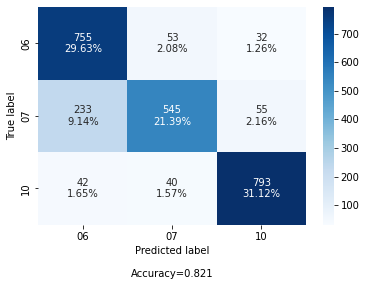

Confusion Matrix for all valid cross_validations against outliers


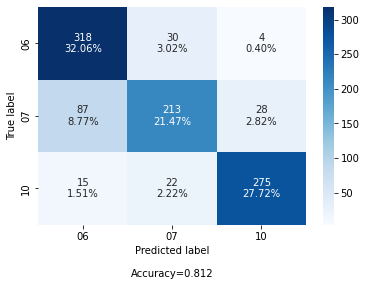

Processing started for split estimator: 10, epochs: [16]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
Processing  6 -fold
Processing  7 -fold
Processing  8 -fold
At split estimator: 10, epochs: [16]
Accurace mean(std): 0.8361728301321958(0.05568026090440531)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.81      0.90      0.85       840
          07       0.86      0.70      0.77       833
          10       0.85      0.91      0.88       875

    accuracy                           0.84      2548
   macro avg       0.84      0.83      0.83      2548
weighted avg       0.84      0.84      0.83      2548

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.81      0.87      0.84       352
          07       0.85      0.68      0.75   

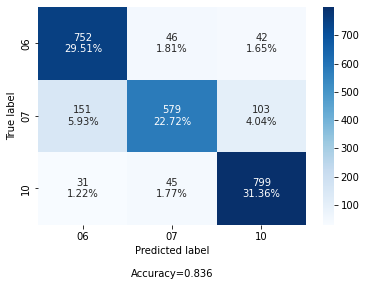

Confusion Matrix for all valid cross_validations against outliers


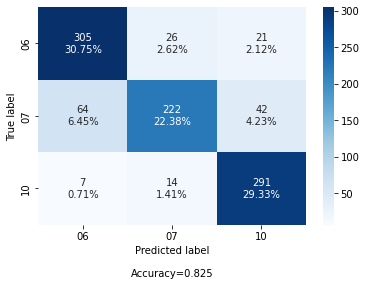

Processing started for split estimator: 10, epochs: [32]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
Processing  6 -fold
Processing  7 -fold
Processing  8 -fold
At split estimator: 10, epochs: [32]
Accurace mean(std): 0.8673393803883194(0.07580711655202127)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.87      0.91      0.89       840
          07       0.87      0.76      0.81       833
          10       0.86      0.92      0.89       875

    accuracy                           0.87      2548
   macro avg       0.87      0.87      0.86      2548
weighted avg       0.87      0.87      0.87      2548

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.88      0.89      0.89       352
          07       0.87      0.73      0.79   

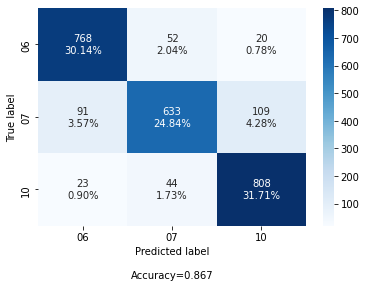

Confusion Matrix for all valid cross_validations against outliers


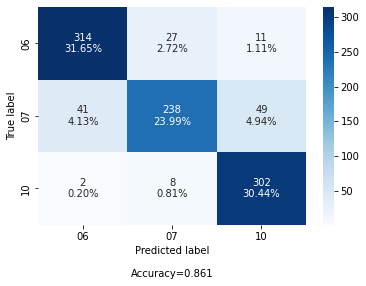

Processing started for split estimator: 10, epochs: [64]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
Processing  6 -fold
Processing  7 -fold
Processing  8 -fold
At split estimator: 10, epochs: [64]
Accurace mean(std): 0.8805398656779134(0.08852610238067796)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.84      0.95      0.89       840
          07       0.92      0.74      0.82       833
          10       0.89      0.95      0.92       875

    accuracy                           0.88      2548
   macro avg       0.88      0.88      0.88      2548
weighted avg       0.88      0.88      0.88      2548

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.85      0.95      0.90       352
          07       0.93      0.73      0.82   

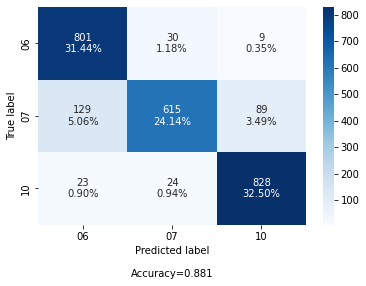

Confusion Matrix for all valid cross_validations against outliers


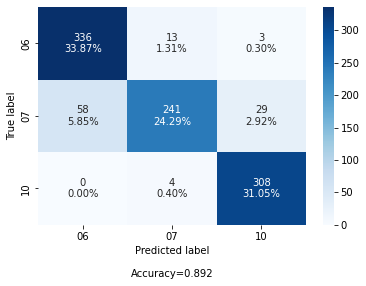

Processing started for split estimator: 10, epochs: [128]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
Processing  6 -fold
Processing  7 -fold
Processing  8 -fold
At split estimator: 10, epochs: [128]
Accurace mean(std): 0.8601337629512167(0.058383395680229835)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.87      0.91      0.89       840
          07       0.92      0.71      0.80       833
          10       0.81      0.95      0.88       875

    accuracy                           0.86      2548
   macro avg       0.87      0.86      0.86      2548
weighted avg       0.87      0.86      0.86      2548

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.87      0.88      0.88       352
          07       0.91      0.69      0.78

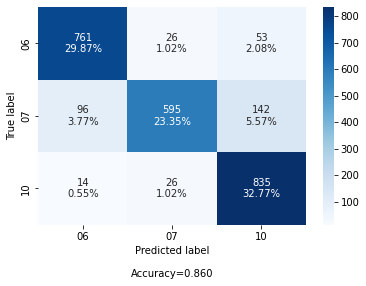

Confusion Matrix for all valid cross_validations against outliers


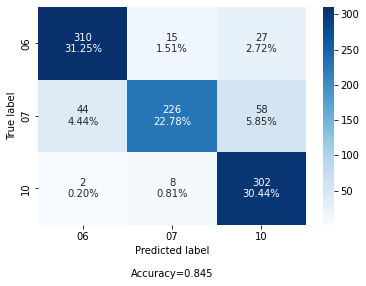

Processing started for split estimator: 5, epochs: [8]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [8]
Accurace mean(std): 0.9093527824039764(0.04527621212933132)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.90      0.87      0.88       480
          07       0.87      0.90      0.88       476
          10       0.95      0.95      0.95       500

    accuracy                           0.91      1456
   macro avg       0.91      0.91      0.91      1456
weighted avg       0.91      0.91      0.91      1456

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.88      0.84      0.86       220
          07       0.85      0.83      0.84       205
          10       0.91      0.98      0.94       195

 

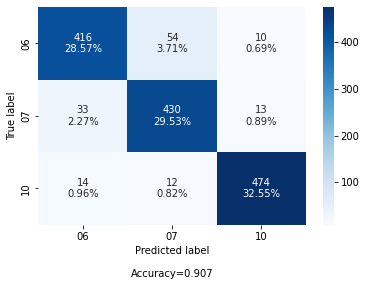

Confusion Matrix for all valid cross_validations against outliers


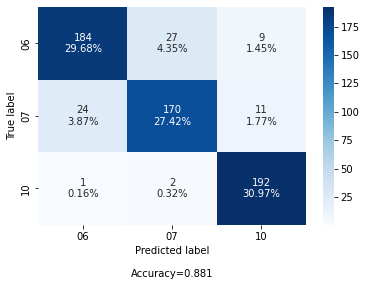

Processing started for split estimator: 5, epochs: [16]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [16]
Accurace mean(std): 0.9052357581380907(0.03809085622670242)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.89      0.89      0.89       480
          07       0.90      0.90      0.90       476
          10       0.93      0.92      0.93       500

    accuracy                           0.91      1456
   macro avg       0.90      0.90      0.90      1456
weighted avg       0.91      0.91      0.91      1456

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.93      0.90      0.92       220
          07       0.91      0.90      0.90       205
          10       0.91      0.95      0.93       195


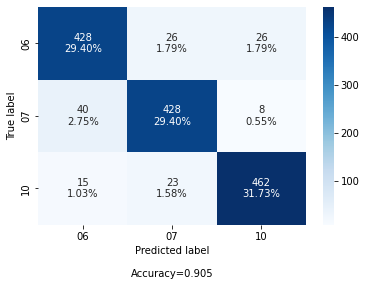

Confusion Matrix for all valid cross_validations against outliers


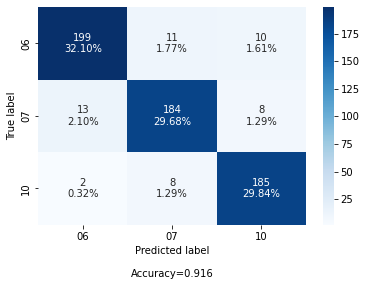

Processing started for split estimator: 5, epochs: [32]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [32]
Accurace mean(std): 0.8967534719466557(0.09079323481435025)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.91      0.94      0.93       480
          07       0.87      0.83      0.85       476
          10       0.89      0.89      0.89       500

    accuracy                           0.89      1456
   macro avg       0.89      0.89      0.89      1456
weighted avg       0.89      0.89      0.89      1456

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.91      0.94      0.92       220
          07       0.88      0.81      0.85       205
          10       0.91      0.94      0.92       195


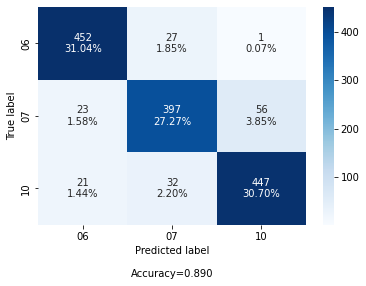

Confusion Matrix for all valid cross_validations against outliers


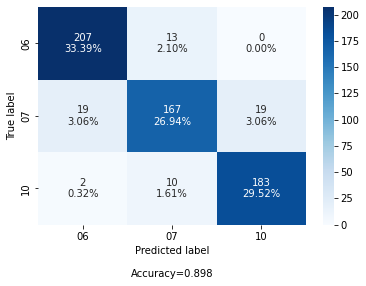

Processing started for split estimator: 5, epochs: [64]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [64]
Accurace mean(std): 0.925507911227962(0.05748524536828443)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.92      0.96      0.94       480
          07       0.91      0.88      0.90       476
          10       0.93      0.92      0.93       500

    accuracy                           0.92      1456
   macro avg       0.92      0.92      0.92      1456
weighted avg       0.92      0.92      0.92      1456

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.93      0.97      0.95       220
          07       0.92      0.85      0.89       205
          10       0.92      0.95      0.94       195



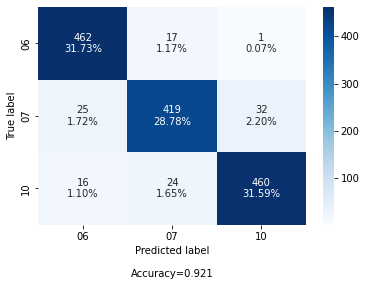

Confusion Matrix for all valid cross_validations against outliers


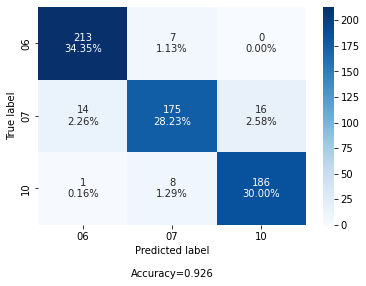

Processing started for split estimator: 5, epochs: [128]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [128]
Accurace mean(std): 0.9399948145964947(0.05251755466475419)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.93      0.97      0.95       480
          07       0.92      0.96      0.94       476
          10       0.97      0.88      0.92       500

    accuracy                           0.94      1456
   macro avg       0.94      0.94      0.94      1456
weighted avg       0.94      0.94      0.94      1456

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.95      0.96      0.95       220
          07       0.92      0.92      0.92       205
          10       0.96      0.94      0.95       19

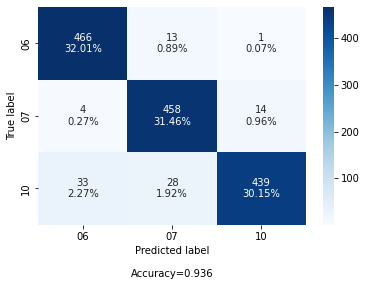

Confusion Matrix for all valid cross_validations against outliers


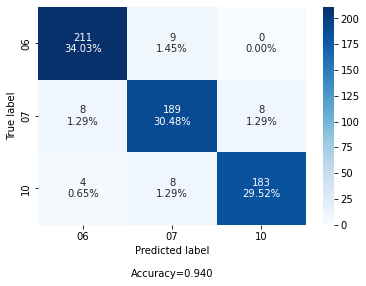

Processing started for split estimator: 4, epochs: [8]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
At split estimator: 4, epochs: [8]
Accurace mean(std): 0.9308400563239159(0.056307167411356586)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.94      0.95      0.94       360
          07       0.96      0.86      0.91       357
          10       0.90      0.98      0.94       375

    accuracy                           0.93      1092
   macro avg       0.93      0.93      0.93      1092
weighted avg       0.93      0.93      0.93      1092

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.94      0.94      0.94       176
          07       0.96      0.82      0.89       164
          10       0.87      1.00      0.93       156

    accuracy        

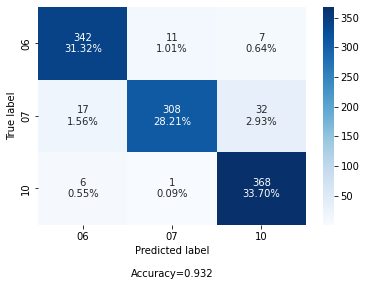

Confusion Matrix for all valid cross_validations against outliers


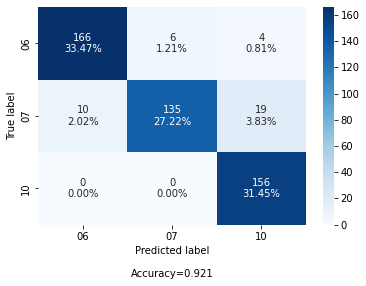

Processing started for split estimator: 4, epochs: [16]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
At split estimator: 4, epochs: [16]
Accurace mean(std): 0.904731258986398(0.0457618863789857)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.84      0.95      0.89       360
          07       0.92      0.84      0.88       357
          10       0.96      0.92      0.94       375

    accuracy                           0.90      1092
   macro avg       0.91      0.90      0.90      1092
weighted avg       0.91      0.90      0.90      1092

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.87      0.98      0.92       176
          07       0.96      0.80      0.87       164
          10       0.95      0.99      0.97       156

    accuracy         

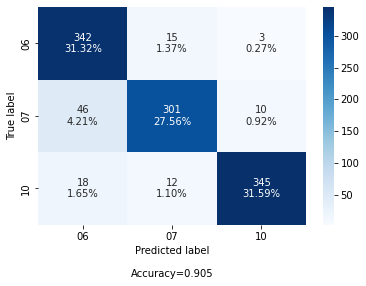

Confusion Matrix for all valid cross_validations against outliers


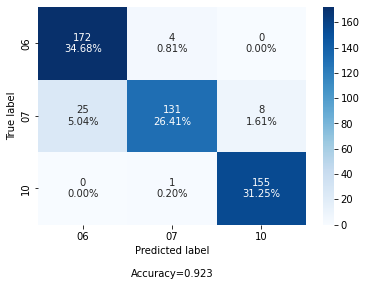

Processing started for split estimator: 4, epochs: [32]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
At split estimator: 4, epochs: [32]
Accurace mean(std): 0.9626520549487648(0.0377527173082539)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.93      1.00      0.96       360
          07       1.00      0.89      0.94       357
          10       0.97      1.00      0.99       375

    accuracy                           0.96      1092
   macro avg       0.97      0.96      0.96      1092
weighted avg       0.97      0.96      0.96      1092

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.93      0.99      0.96       176
          07       0.99      0.88      0.93       164
          10       0.96      0.99      0.97       156

    accuracy        

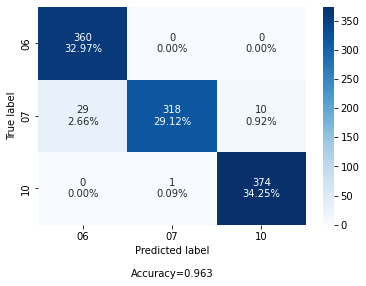

Confusion Matrix for all valid cross_validations against outliers


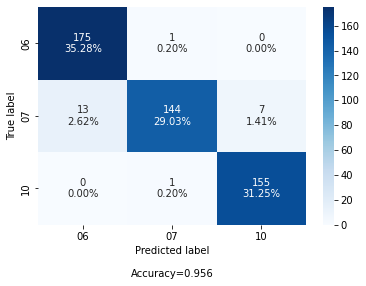

Processing started for split estimator: 4, epochs: [64]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
At split estimator: 4, epochs: [64]
Accurace mean(std): 0.9275311615571034(0.021375149770970357)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.95      0.94      0.95       360
          07       0.95      0.87      0.91       357
          10       0.89      0.96      0.93       375

    accuracy                           0.93      1092
   macro avg       0.93      0.93      0.93      1092
weighted avg       0.93      0.93      0.93      1092

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.94      0.97      0.95       176
          07       0.96      0.84      0.90       164
          10       0.88      0.97      0.92       156

    accuracy      

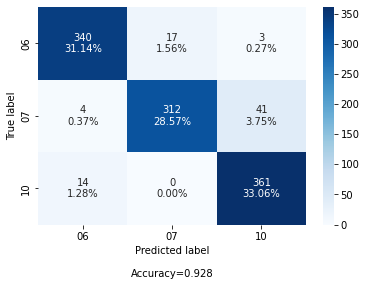

Confusion Matrix for all valid cross_validations against outliers


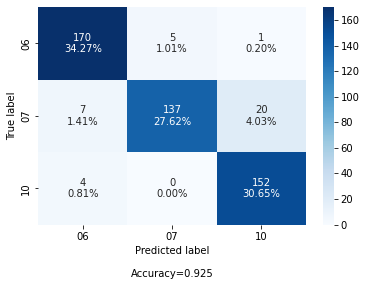

Processing started for split estimator: 4, epochs: [128]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
At split estimator: 4, epochs: [128]
Accurace mean(std): 0.9580947067205126(0.042841354849541304)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.91      0.97      0.94       360
          07       0.98      0.91      0.94       357
          10       0.99      0.99      0.99       375

    accuracy                           0.96      1092
   macro avg       0.96      0.96      0.96      1092
weighted avg       0.96      0.96      0.96      1092

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.91      0.98      0.95       176
          07       0.97      0.87      0.91       164
          10       0.96      0.99      0.97       156

    accuracy    

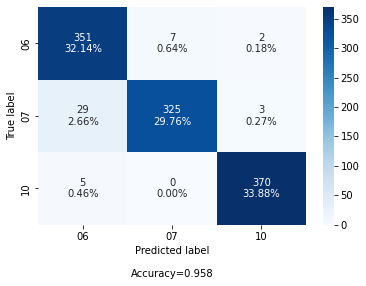

Confusion Matrix for all valid cross_validations against outliers


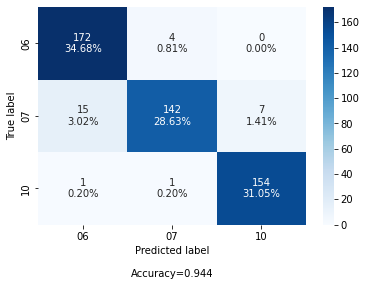

Processing started for split estimator: 2, epochs: [8]
Processing  1 -fold
Processing  2 -fold
At split estimator: 2, epochs: [8]
Accurace mean(std): 0.9783607350096712(0.010275628626692457)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.99      0.98      0.99       120
          07       0.99      0.95      0.97       119
          10       0.95      1.00      0.98       125

    accuracy                           0.98       364
   macro avg       0.98      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.97      0.99      0.98        88
          07       0.99      0.91      0.95        82
          10       0.95      1.00      0.97        78

    accuracy                           0.97       248
   mac

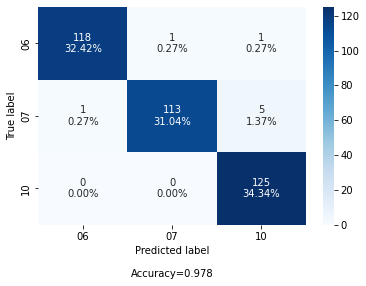

Confusion Matrix for all valid cross_validations against outliers


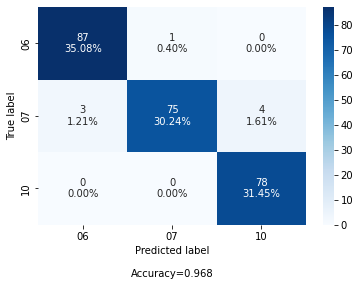

Processing started for split estimator: 2, epochs: [16]
Processing  1 -fold
Processing  2 -fold
At split estimator: 2, epochs: [16]
Accurace mean(std): 0.9973958333333333(0.002604166666666685)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.99      1.00      1.00       120
          07       1.00      1.00      1.00       119
          10       1.00      0.99      1.00       125

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.98      0.99      0.98        88
          07       0.99      0.94      0.96        82
          10       0.96      1.00      0.98        78

    accuracy                           0.98       248
   m

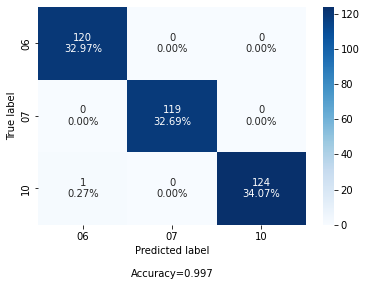

Confusion Matrix for all valid cross_validations against outliers


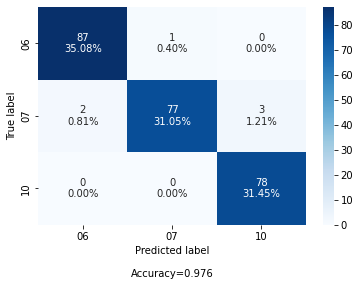

Processing started for split estimator: 2, epochs: [32]
Processing  1 -fold
Processing  2 -fold
At split estimator: 2, epochs: [32]
Accurace mean(std): 0.9616779497098646(0.004231141199226296)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.97      0.98      0.98       120
          07       0.96      0.96      0.96       119
          10       0.96      0.94      0.95       125

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.98      1.00      0.99        88
          07       1.00      0.93      0.96        82
          10       0.95      1.00      0.97        78

    accuracy                           0.98       248
   m

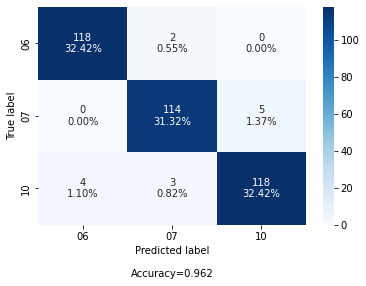

Confusion Matrix for all valid cross_validations against outliers


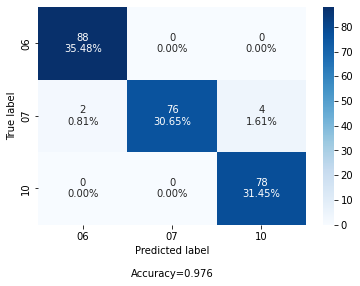

Processing started for split estimator: 2, epochs: [64]
Processing  1 -fold
Processing  2 -fold
At split estimator: 2, epochs: [64]
Accurace mean(std): 0.9369169459288108(0.018884159043564885)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.89      0.99      0.94       120
          07       0.99      0.88      0.93       119
          10       0.94      0.94      0.94       125

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.98      0.99      0.98        88
          07       0.99      0.93      0.96        82
          10       0.95      1.00      0.97        78

    accuracy                           0.97       248
   m

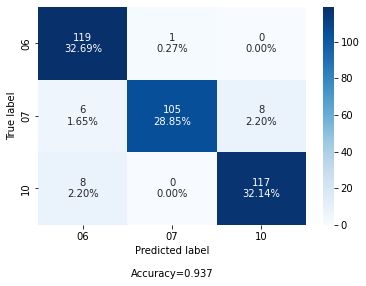

Confusion Matrix for all valid cross_validations against outliers


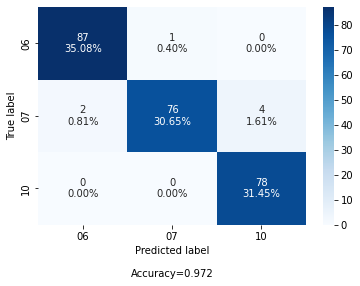

Processing started for split estimator: 2, epochs: [128]
Processing  1 -fold
Processing  2 -fold
At split estimator: 2, epochs: [128]
Accurace mean(std): 0.9337318479606316(0.060803671165051476)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.84      1.00      0.91       120
          07       1.00      0.87      0.93       119
          10       0.99      0.94      0.96       125

    accuracy                           0.93       364
   macro avg       0.94      0.93      0.93       364
weighted avg       0.94      0.93      0.93       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.88      1.00      0.94        88
          07       1.00      0.84      0.91        82
          10       0.97      0.99      0.98        78

    accuracy                           0.94       248
  

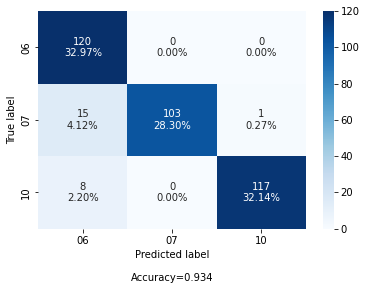

Confusion Matrix for all valid cross_validations against outliers


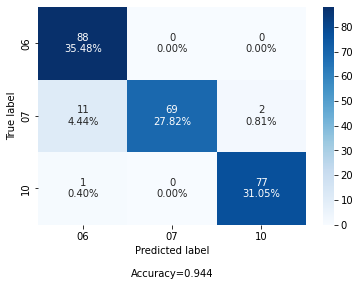

Processing started for real split: 5, epochs: [8]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [8]
Accurace mean(std): 0.9814736842105264(0.02303892887630226)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.99      0.98      0.99       120
          07       0.98      0.99      0.99       119
          10       0.99      0.99      0.99       125

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.97      1.00      0.98       220
          07       0.99      0.95      0.97       205
          10       0.98      1.00      0.99       195

    ac

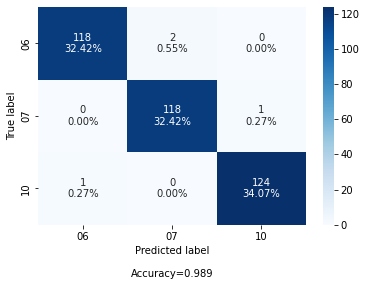

Confusion Matrix for all valid cross_validations against outliers


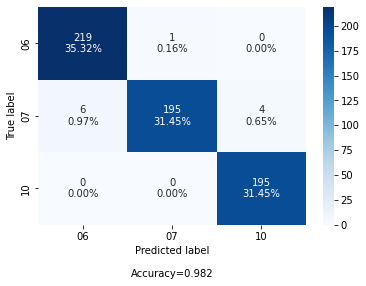

Processing started for real split: 5, epochs: [16]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [16]
Accurace mean(std): 0.9879999999999999(0.02400000000000002)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.99      1.00      1.00       120
          07       0.98      1.00      0.99       119
          10       1.00      0.98      0.99       125

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.98      1.00      0.99       220
          07       0.99      0.95      0.97       205
          10       0.97      1.00      0.98       195

    

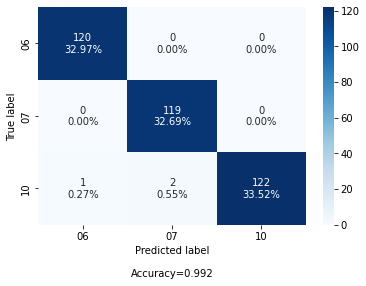

Confusion Matrix for all valid cross_validations against outliers


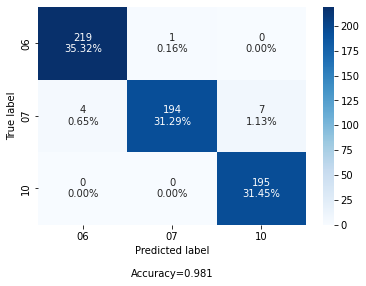

Processing started for real split: 5, epochs: [32]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [32]
Accurace mean(std): 0.9881162887455794(0.010845550545698447)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.99      0.98      0.99       120
          07       0.99      0.99      0.99       119
          10       0.99      1.00      1.00       125

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.97      0.99      0.98       220
          07       0.98      0.94      0.96       205
          10       0.97      0.99      0.98       195

   

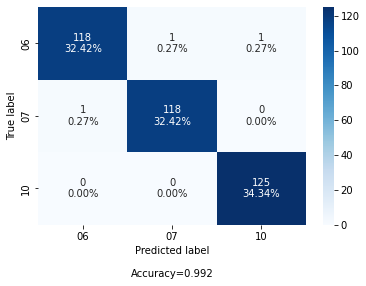

Confusion Matrix for all valid cross_validations against outliers


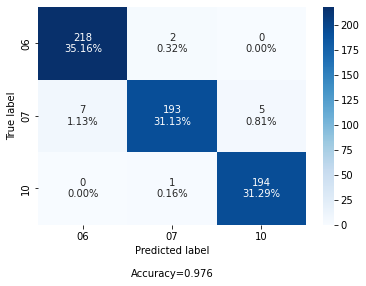

Processing started for real split: 5, epochs: [64]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [64]
Accurace mean(std): 0.9520783564261827(0.07580169832277567)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.92      1.00      0.96       120
          07       1.00      0.97      0.98       119
          10       0.97      0.93      0.95       125

    accuracy                           0.96       364
   macro avg       0.97      0.96      0.96       364
weighted avg       0.97      0.96      0.96       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.97      1.00      0.99       220
          07       1.00      0.95      0.97       205
          10       0.97      0.99      0.98       195

    

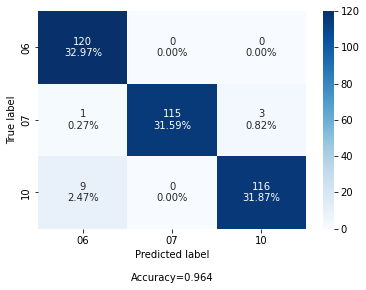

Confusion Matrix for all valid cross_validations against outliers


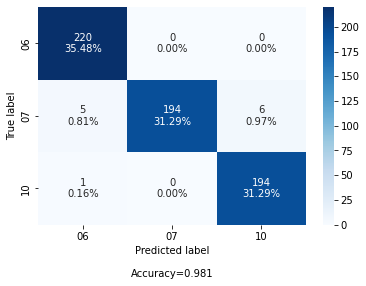

Processing started for real split: 5, epochs: [128]
Processing  1 -fold
Processing  2 -fold
Processing  3 -fold
Processing  4 -fold
Processing  5 -fold
At split estimator: 5, epochs: [128]
Accurace mean(std): 0.9908568443051202(0.011198337749875479)
Classification report for all valid cross_validations against their tests sets
              precision    recall  f1-score   support

          06       0.98      1.00      0.99       120
          07       1.00      0.98      0.99       119
          10       0.98      0.98      0.98       125

    accuracy                           0.99       364
   macro avg       0.99      0.99      0.99       364
weighted avg       0.99      0.99      0.99       364

Classification report for all valid cross_validations against outliers
              precision    recall  f1-score   support

          06       0.99      1.00      0.99       220
          07       0.99      0.95      0.97       205
          10       0.97      0.99      0.98       195

 

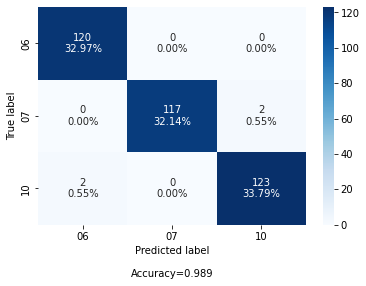

Confusion Matrix for all valid cross_validations against outliers


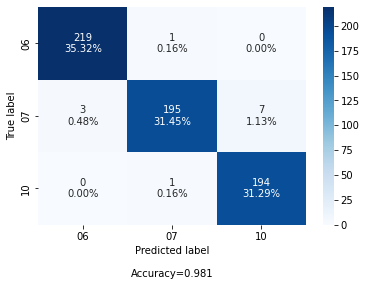

In [3]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")



def create_transfer_models(baseset, gesture_subset):
    print("Processing tranfers models at 10%, 20%, 25%, 50% and 80% data for gestures: ", gesture_subset)
    print("Baseset: ", baseset)
    print("Loadind Dataset: ", gesture_subset)
    path = 'gestures-dataset'
    dataset = None

    samples = 0
    for subject in os.listdir(path):
        if os.path.isfile(os.path.join(path, subject)):
            continue
        if subject in ('U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'):
            for gesture in os.listdir(os.path.join(path, subject)):
                if os.path.isfile(os.path.join(path, subject, gesture)):
                    continue
                gesture = str(gesture)
                if gesture not in gesture_subset:
                    continue
                for samplefile in os.listdir(os.path.join(path, subject, gesture)):
                    if os.path.isfile(os.path.join(path, subject, gesture, samplefile)):
                        df = pd.read_csv(os.path.join(path, subject, gesture, samplefile), \
                            sep = ' ', \
                            names = ['System.currentTimeMillis()', \
                            'System.nanoTime()', \
                            'sample.timestamp', \
                            'X', \
                            'Y', \
                            'Z' \
                            ])
                        df = df[["sample.timestamp", "X", "Y", "Z"]]
                                        
                        start = df["sample.timestamp"][0]
                        df["sample.timestamp"] -= start
                        df["sample.timestamp"] /= 10000000
                        df["subject"] = subject
                        df["gesture"] = gesture
                        df["sample"] = str(samplefile[:-4])
                        samples += 1
                        #print(df)
                        if dataset is None:
                            dataset = df.copy()
                        else:
                            dataset = pd.concat([dataset, df])

    dataset = dataset.sort_values(by=['gesture','subject','sample','sample.timestamp'])
    data = dataset    
    print(str(samples) + " samples loaded")

    print("Scaling Dataset: ", gesture_subset)
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    dataset_scaled = None

    samples = 0
    for i, gesture in enumerate(gesture_subset):
        df_gesture=data[data['gesture']==gesture] 
        for j, subject in enumerate(df_gesture['subject'].unique()):
            df_subject=df_gesture[df_gesture['subject']==subject]
            for k, sample in enumerate(df_subject['sample'].unique()):
                df_sample=df_subject[df_subject['sample']==sample].copy()
                df_sample.sort_values(by=['sample.timestamp'])

                sc = scaler
                sc = sc.fit_transform(df_sample[["X", "Y", "Z"]])
                sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
                df_sample['X'] = sc['X']
                df_sample['Y'] = sc['Y']
                df_sample['Z'] = sc['Z']
                if dataset_scaled is None:
                    dataset_scaled = df_sample.copy()
                else:
                    dataset_scaled = pd.concat([dataset_scaled, df_sample])
                samples += 1
    print(str(samples) + " samples scaled")
    data = dataset_scaled

    print("Cleaning Dataset: ", gesture_subset)
    dataset_outliers = None
    dataset_cleaned = None

    samples = 0
    outliers = 0
    for i, gesture in enumerate(gesture_subset):
        df_gesture = data[data['gesture']==gesture]
        for j, subject in enumerate(df_gesture['subject'].unique()):
            df_subject = df_gesture[df_gesture['subject']==subject]
        
            time_mean = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['mean']})
            time_std = df_subject.groupby(["gesture","subject", "sample"]).count().groupby(["gesture","subject"]).agg({'sample.timestamp': ['std']})
            time_max = time_mean['sample.timestamp'].iloc[0]['mean'] + 1.0 * time_std['sample.timestamp'].iloc[0]['std']
            time_min = time_mean['sample.timestamp'].iloc[0]['mean'] - 1.0 * time_std['sample.timestamp'].iloc[0]['std']
            for k, sample in enumerate(df_subject['sample'].unique()):
                df_sample=df_subject[df_subject['sample']==sample]
                df_sample_count = df_sample.count()['sample.timestamp']
                if df_sample_count < time_min or df_sample_count > time_max:
                    if dataset_outliers is None:
                        dataset_outliers = df_sample.copy()
                    else:
                        dataset_outliers = pd.concat([dataset_outliers, df_sample])
                    outliers += 1
                else:
                    if dataset_cleaned is None:
                        dataset_cleaned = df_sample.copy()
                    else:
                        dataset_cleaned = pd.concat([dataset_cleaned, df_sample])
                    samples += 1
    print(str(samples) + " samples cleaned")
    print(str(outliers) + " samples outliers")
    data = dataset_cleaned
    
    print("Time slicing Cleaned Dataset: ", gesture_subset)
    dataset_timecut = None
    samples = 0
    damaged = 0
    for i, gesture in enumerate(data['gesture'].unique()):
        df_gesture = data[data['gesture']==gesture]
        for j, subject in enumerate(df_gesture['subject'].unique()):
            df_subject = df_gesture[df_gesture['subject']==subject] 
            time_max = 19 # 18 * 11 = 198
            for i, sample in enumerate(df_subject['sample'].unique()):
                df_sample = df_subject[df_subject['sample']==sample]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
                if df_sample_count >= time_max:
                    df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                    df_sample_count = df_sample.count()['sample.timestamp']
                    #print(df_sample_count)
                elif df_sample_count < time_max:
                    for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                        df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, subject, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'subject', 'sample'])
                        df_sample = df_sample.append(df, ignore_index=True)            
                #print(df_sample)
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
                if df_sample_count != time_max:
                    damaged += 1
                    continue
                if dataset_timecut is None:
                    dataset_timecut = df_sample.copy()
                else:
                    dataset_timecut = pd.concat([dataset_timecut, df_sample])
                samples += 1

    dataset_cleaned = dataset_timecut
    print(str(samples) + " cleaned samples sliced")
    print(str(damaged) + " cleaned samples damaged")

    data = dataset_outliers
    print("Time slicing Outliers Dataset: ", gesture_subset)
    dataset_timecut = None
    samples = 0
    damaged = 0
    for i, gesture in enumerate(data['gesture'].unique()):
        df_gesture = data[data['gesture']==gesture]
        for j, subject in enumerate(df_gesture['subject'].unique()):
            df_subject = df_gesture[df_gesture['subject']==subject] 
            time_max = 19 # 18 * 11 = 198
            for i, sample in enumerate(df_subject['sample'].unique()):
                df_sample = df_subject[df_subject['sample']==sample]
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
                if df_sample_count >= time_max:
                    df_sample = df_sample[df_sample['sample.timestamp'] <= (11 * (time_max-1))]
                    df_sample_count = df_sample.count()['sample.timestamp']
                    #print(df_sample_count)
                elif df_sample_count < time_max:
                    for tmp in range(df_sample_count * 11, (time_max) * 11, 11):
                        df = pd.DataFrame([[tmp, 0.0, 0.0, 0.0, gesture, subject, sample]], columns=['sample.timestamp', 'X', 'Y', 'Z', 'gesture', 'subject', 'sample'])
                        df_sample = df_sample.append(df, ignore_index=True)            
                #print(df_sample)
                df_sample_count = df_sample.count()['sample.timestamp']
                #print(df_sample_count)
                if df_sample_count != time_max:
                    damaged += 1
                    continue
                if dataset_timecut is None:
                    dataset_timecut = df_sample.copy()
                else:
                    dataset_timecut = pd.concat([dataset_timecut, df_sample])
                samples += 1

    dataset_outliers = dataset_timecut
    print(str(samples) + " outliers samples sliced")
    print(str(damaged) + " outliers samples damaged")

    from keras import backend as K
    data = dataset_cleaned
    from keras.models import Sequential
    from keras.layers import Bidirectional
    from keras.layers import LSTM
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.optimizers import adam_v2
    from keras.wrappers.scikit_learn import KerasClassifier
    from sklearn.model_selection import StratifiedGroupKFold
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import GridSearchCV
    from keras.utils import np_utils
    from sklearn.preprocessing import LabelEncoder
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import accuracy_score
    import numpy as np
    import tensorflow as tf
 
    # fix random seed for reproducibility
    seed = 1000
    np.random.seed(seed)
    # create the dataset
    def get_dataset(data, index=[]):
        X_train = []
        Y_train = []
        groups = []
        samples_idx=0
        for i, gesture in enumerate(data['gesture'].unique()):
            df_gesture = data[data['gesture']==gesture]
            for j, subject in enumerate(df_gesture['subject'].unique()):
                df_subject = df_gesture[df_gesture['subject']==subject]
                for k, sample in enumerate(df_subject['sample'].unique()):
                    df_sample = df_subject[df_subject['sample']==sample]
                    accel_vector = []
                    for idx, row in df_sample.sort_values(by='sample.timestamp').iterrows():
                        accel_vector.append([row['X'],row['Y'],row['Z']])
                    accel_vector = np.asarray(accel_vector)
                    if len(index)==0:
                        X_train.append(accel_vector)
                        Y_train.append(gesture)
                        groups.append(subject)
                    else:
                        if samples_idx in index:
                            X_train.append(accel_vector)
                            Y_train.append(gesture)
                            groups.append(subject)
                    samples_idx+=1
        X_train = np.asarray(X_train)
        Y_train = LabelEncoder().fit_transform(Y_train)
        #print(Y_train)
        return X_train, Y_train, groups


    def build_model(baseset, gesture_subset):
        baseset.sort()
        basename = '-'.join(baseset)
        basemodel = tf.keras.models.load_model(basename + '_lstm')
        model = tf.keras.Sequential()
        for layer in basemodel.layers[:-1]: # go through until last layer
            layer.trainable= True
            model.add(layer)
        model.add(tf.keras.layers.Dense(len(gesture_subset), activation='softmax', name="transfer_adjust"))
        model.build([None, 19, 3])
        #print(model.summary())
        model.compile(loss='sparse_categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.001), metrics=['accuracy'])
        return model
    
    # Function to create model, required for KerasClassifier
    import pickle
    def load_classifier(baseset, gesture_subset):
        gesture_subset.sort()
        name = '-'.join(gesture_subset)
        classifier = KerasClassifier(build_fn=build_model, baseset=baseset, gesture_subset=gesture_subset, epochs=128, batch_size=19, verbose=0)
        classifier.classes_ = pickle.load(open(name + '_model_classes.pkl','rb'))
        classifier.model = build_model(baseset,gesture_subset)
        return classifier
    
    #print(model.model.summary())
    #print(model.classes_)
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix

    for n_splits in [10, 5, 4, 2]:
        for epoch in [[8], [16], [32], [64], [128]]:
            cv = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=(1000+epoch[0]))
            X, y, g = get_dataset(dataset_cleaned)
            
            # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
            accuracy_model = []
            best_estimator = None
            # Initialize the array to zero which will store the confusion matrix
            array = None
            outliers = None
            
            report_cleaned = None
            report_outliers = None                  
            
            print("Processing started for split estimator: " + str(n_splits) + ", epochs: " + str(epoch))
            # Iterate over each train-test split
            fold = 1
            for train_index, test_index in cv.split(X, y, g):
                #print(test_index)
                if len(test_index) == 0:
                    continue
                print("Processing ", fold, "-fold")
                fold += 1
                    
                classifier = load_classifier(baseset, gesture_subset)
                # Split train-test (Inverted)
                X_train, y_train, group_train = get_dataset(dataset_cleaned, test_index)
                X_test, y_test, group_test = get_dataset(dataset_cleaned, train_index)
                X_outliers, y_outliers, group_test = get_dataset(dataset_outliers)
                # Train the model
                History = classifier.fit(X_train, y_train, epochs=epoch[0])
                # Append to accuracy_model the accuracy of the model
                accuracy_model.append(accuracy_score(y_test, classifier.predict(X_test), normalize=True))
                if accuracy_model[-1] == max(accuracy_model):
                    best_estimator = classifier
                # Calculate the confusion matrix
                c = confusion_matrix(y_test, classifier.predict(X_test))
                # Add the score to the previous confusion matrix of previous model
                if isinstance(array, np.ndarray) == False:
                    array = c.copy()
                else:
                    array = array + c

                # Calculate the confusion matrix
                c = confusion_matrix(y_outliers, classifier.predict(X_outliers))
                # Add the score to the previous confusion matrix of previous model
                if isinstance(outliers, np.ndarray) == False:
                    outliers = c.copy()
                else:
                    outliers = outliers + c
                
                #Accumulate for classification report
                if isinstance(report_cleaned, list) == False:
                    report_cleaned = [y_test, classifier.predict(X_test)]
                else:
                    report_cleaned[0] = np.append(report_cleaned[0],y_test)
                    report_cleaned[1] = np.append(report_cleaned[1],classifier.predict(X_test))
                #Accumulate for classification report
                if isinstance(report_outliers, list) == False:
                    report_outliers = [y_outliers, classifier.predict(X_outliers)]
                else:
                    report_outliers[0] = np.append(report_outliers[0],y_outliers)
                    report_outliers[1] = np.append(report_outliers[1],classifier.predict(X_outliers))
            
            # Print the accuracy    
            print("At split estimator: " + str(n_splits) + ", epochs: " + str(epoch))
            print("Accurace mean(std): " + str(np.mean(accuracy_model)) + "(" + str(np.std(accuracy_model)) + ")")
            
            # To calculate the classification reports
            
            print("Classification report for all valid cross_validations against their tests sets")
            print(classification_report(report_cleaned[0], report_cleaned[1], target_names=gesture_subset))    
            
            print("Classification report for all valid cross_validations against outliers")
            print(classification_report(report_outliers[0], report_outliers[1], target_names=gesture_subset))    
            
            # To calculate the confusion matrix
            
            print("Confusion Matrix for all valid cross_validations against their tests sets")
            make_confusion_matrix(array, categories=gesture_subset)
            
            print("Confusion Matrix for all valid cross_validations against outliers")
            make_confusion_matrix(outliers, categories=gesture_subset)

    for n_splits in [5]:
        for epoch in [[8], [16], [32], [64], [128]]:
            cv = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=(1000+epoch[0]))
            X, y, g = get_dataset(dataset_cleaned)
            
            # Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
            accuracy_model = []
            best_estimator = None
            # Initialize the array to zero which will store the confusion matrix
            array = None
            outliers = None
            
            report_cleaned = None
            report_outliers = None                  
            
            print("Processing started for real split: " + str(n_splits) + ", epochs: " + str(epoch))
            # Iterate over each train-test split
            fold = 1
            for train_index, test_index in cv.split(X, y, g):
                #print(test_index)
                if len(test_index) == 0:
                    continue
                print("Processing ", fold, "-fold")
                fold += 1
                    
                classifier = load_classifier(baseset, gesture_subset)
                # Split train-test (Inverted)
                X_train, y_train, group_train = get_dataset(dataset_cleaned, train_index)
                X_test, y_test, group_test = get_dataset(dataset_cleaned, test_index)
                X_outliers, y_outliers, group_test = get_dataset(dataset_outliers)
                # Train the model
                History = classifier.fit(X_train, y_train, epochs=epoch[0])
                # Append to accuracy_model the accuracy of the model
                accuracy_model.append(accuracy_score(y_test, classifier.predict(X_test), normalize=True))
                if accuracy_model[-1] == max(accuracy_model):
                    best_estimator = classifier
                # Calculate the confusion matrix
                c = confusion_matrix(y_test, classifier.predict(X_test))
                # Add the score to the previous confusion matrix of previous model
                if isinstance(array, np.ndarray) == False:
                    array = c.copy()
                else:
                    array = array + c

                # Calculate the confusion matrix
                c = confusion_matrix(y_outliers, classifier.predict(X_outliers))
                # Add the score to the previous confusion matrix of previous model
                if isinstance(outliers, np.ndarray) == False:
                    outliers = c.copy()
                else:
                    outliers = outliers + c
                
                #Accumulate for classification report
                if isinstance(report_cleaned, list) == False:
                    report_cleaned = [y_test, classifier.predict(X_test)]
                else:
                    report_cleaned[0] = np.append(report_cleaned[0],y_test)
                    report_cleaned[1] = np.append(report_cleaned[1],classifier.predict(X_test))
                #Accumulate for classification report
                if isinstance(report_outliers, list) == False:
                    report_outliers = [y_outliers, classifier.predict(X_outliers)]
                else:
                    report_outliers[0] = np.append(report_outliers[0],y_outliers)
                    report_outliers[1] = np.append(report_outliers[1],classifier.predict(X_outliers))
            
            # Print the accuracy    
            print("At split estimator: " + str(n_splits) + ", epochs: " + str(epoch))
            print("Accurace mean(std): " + str(np.mean(accuracy_model)) + "(" + str(np.std(accuracy_model)) + ")")
            
            # To calculate the classification reports
            
            print("Classification report for all valid cross_validations against their tests sets")
            print(classification_report(report_cleaned[0], report_cleaned[1], target_names=gesture_subset))    
            
            print("Classification report for all valid cross_validations against outliers")
            print(classification_report(report_outliers[0], report_outliers[1], target_names=gesture_subset))    
            
            # To calculate the confusion matrix
            
            print("Confusion Matrix for all valid cross_validations against their tests sets")
            make_confusion_matrix(array, categories=gesture_subset)
            
            print("Confusion Matrix for all valid cross_validations against outliers")
            make_confusion_matrix(outliers, categories=gesture_subset)


                       
baseset = base_transfer_set
dataset = transfers_size_3[1]

model = create_transfer_models(baseset, dataset)